In [215]:
import numpy as np
import pandas as pd

In [216]:
df=pd.read_excel("covid19_jhu_csse_summary_BigQuery_bycounty.xlsx")

In [217]:
df.head()

,state,county,confirmed,deaths,recovered,active
30,Iowa,Iowa,24,0,0,24
31,Iowa,Iowa,26,0,0,26
32,Iowa,Iowa,27,0,0,27
33,Iowa,Iowa,27,0,0,27
34,Iowa,Iowa,27,0,0,27


In [218]:
death=df.groupby("county").max()

In [219]:
death.drop(["state"],axis=1,inplace=True)

In [220]:
death.head()

,confirmed,deaths,recovered,active
county,,,,
Abbeville,34,0,0,34
Acadia,152,11,0,141
Accomack,524,7,0,517
Ada,739,21,0,718
Adair,88,13,0,76


In [221]:
disability=pd.read_csv("Disability_by_Type,_2014-2018.csv")
def nam(val):
    strr=val.split(" ")[0]
    return strr
disability["NAME"]=disability["NAME"].apply(nam)
disability=disability.groupby("NAME").sum()
disability=disability[['\xa0Population under 18 years','\xa0Population under 18 years with one type of disability','\xa0Population under 18 years with two or more types of disability','\xa0Population 18 to 64 years','\xa0Population 18 to 64 years with one type of disability','\xa0Population 18 to 64 years with two or more types of disability','\xa0Population 65 years and over','\xa0Population 65 years and over with one type of disability','\xa0Population 65 years and over with two or more types of disability','\xa0Population with a hearing difficulty','\xa0Population with a vision difficulty', '\xa0Population 5 years and over with a cognitive difficulty', '\xa0Population 5 years and over with an ambulatory difficulty', '\xa0Population 5 years and over with a self-care difficulty','\xa0Population 18 years and over with an independent living difficulty', '\xa0Population with a disability']]
disability["population under 18 with disability"]=disability["\xa0Population under 18 years with one type of disability"]+disability['\xa0Population under 18 years with two or more types of disability']
disability["population between 18 to 64 with disability"]=disability["\xa0Population 18 to 64 years with one type of disability"]+disability["\xa0Population 18 to 64 years with two or more types of disability"]
disability["population above 64 with disability"]=disability["\xa0Population 65 years and over with one type of disability"]+disability["\xa0Population 65 years and over with two or more types of disability"]
disability.drop(["\xa0Population under 18 years with one type of disability",'\xa0Population under 18 years with two or more types of disability',"\xa0Population 18 to 64 years with one type of disability","\xa0Population 18 to 64 years with two or more types of disability","\xa0Population 65 years and over with one type of disability","\xa0Population 65 years and over with two or more types of disability"],axis=1,inplace=True)
disability.head()

,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability
NAME,,,,,,,,,,,,,
Abbeville,5164,14313,4954,1359,1012,1685,2894,909,1912,5019,383,2435,2201
Acadia,16527,36635,8493,3217,3144,4648,6712,2714,4203,11657,1375,6185,4097
Accomack,6881,18515,7036,1342,893,1564,2416,904,1530,4320,227,1874,2219
Ada,109050,270636,59118,14833,8083,18386,19356,9052,15521,44581,3748,22614,18219
Adair,15649,45815,11498,3799,2532,4179,6862,2453,4053,12001,651,6459,4891


In [222]:
#table for bed
bed=pd.read_csv("Definitive_Healthcare__USA_Hospital_Beds.csv")
bed=bed.groupby("COUNTY_NAME").sum()
bed=bed["NUM_LICENSED_BEDS"]
bed=bed.to_frame()
bed.head()

,NUM_LICENSED_BEDS
COUNTY_NAME,
Abbeville,25.0
Acadia,170.0
Accomack,52.0
Ada,1351.0
Adair,185.0


In [223]:
#population table
pop=pd.read_csv("acs2017_county_data.csv")
def nam(val):
    strr=val.split(" ")[0]
    return strr
pop["County"]=pop["County"].apply(nam)
pop=pop.groupby("County").sum()
pop=pop[["TotalPop","CountyId"]]
pop.head()

,TotalPop,CountyId
County,,
Abbeville,24788,45001
Acadia,62607,22001
Accomack,32840,51001
Ada,435117,16001
Adair,74069,109004


In [224]:
#dataframe for Number of practitoner required 
pract=pd.read_excel("health_professional_shortage_src-bigquery.xlsx")
pract=pract.groupby("County_Name").sum()
pract=pract["HPSA_Shortage"]
pract=pract.to_frame()
pract.head()

,HPSA_Shortage
County_Name,
Abbeville,2.2000
Acadia,3.3900
Accomack,0.1200
Ada,2.4600
Adair,12.8488


In [225]:
final_tab=pd.concat([pop,disability,pract,bed,death], axis=1, join='inner')

In [226]:
final_tab.shape

(1330, 21)

In [227]:
final_tab.head()

,TotalPop,CountyId,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,...,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability,HPSA_Shortage,NUM_LICENSED_BEDS,confirmed,deaths,recovered,active
Abbeville,24788,45001,5164,14313,4954,1359,1012,1685,2894,909,...,5019,383,2435,2201,2.2000,25.0,34,0,0,34
Acadia,62607,22001,16527,36635,8493,3217,3144,4648,6712,2714,...,11657,1375,6185,4097,3.3900,170.0,152,11,0,141
Accomack,32840,51001,6881,18515,7036,1342,893,1564,2416,904,...,4320,227,1874,2219,0.1200,52.0,524,7,0,517
Ada,435117,16001,109050,270636,59118,14833,8083,18386,19356,9052,...,44581,3748,22614,18219,2.4600,1351.0,739,21,0,718
Adair,74069,109004,15649,45815,11498,3799,2532,4179,6862,2453,...,12001,651,6459,4891,12.8488,185.0,88,13,0,76


In [228]:
final_tab.drop(["CountyId"],axis=1,inplace=True)
list(final_tab.columns)


['TotalPop',
 '\xa0Population under 18 years',
 '\xa0Population 18 to 64 years',
 '\xa0Population 65 years and over',
 '\xa0Population with a hearing difficulty',
 '\xa0Population with a vision difficulty',
 '\xa0Population 5 years and over with a cognitive difficulty',
 '\xa0Population 5 years and over with an ambulatory difficulty',
 '\xa0Population 5 years and over with a self-care difficulty',
 '\xa0Population 18 years and over with an independent living difficulty',
 '\xa0Population with a disability',
 'population under 18 with disability',
 'population between 18 to 64 with disability',
 'population above 64 with disability',
 'HPSA_Shortage',
 'NUM_LICENSED_BEDS',
 'confirmed',
 'deaths',
 'recovered',
 'active']

In [229]:
final_tab['\xa0Population under 18 years']=final_tab['\xa0Population under 18 years']/final_tab["TotalPop"]*100
final_tab['\xa0Population 18 to 64 years']=final_tab['\xa0Population 18 to 64 years']/final_tab["TotalPop"]*100
final_tab['\xa0Population 65 years and over']=final_tab['\xa0Population 65 years and over']/final_tab["TotalPop"]*100
final_tab['\xa0Population with a hearing difficulty']=final_tab['\xa0Population with a hearing difficulty']/final_tab["TotalPop"]*100
final_tab['\xa0Population with a vision difficulty']=final_tab['\xa0Population with a vision difficulty']/final_tab["TotalPop"]*100
final_tab['\xa0Population 5 years and over with a cognitive difficulty']=final_tab['\xa0Population 5 years and over with a cognitive difficulty']/final_tab["TotalPop"]*100
final_tab['\xa0Population 5 years and over with an ambulatory difficulty']=final_tab['\xa0Population 5 years and over with an ambulatory difficulty']/final_tab["TotalPop"]*100

In [230]:
final_tab['\xa0Population 5 years and over with a self-care difficulty']=final_tab['\xa0Population 5 years and over with a self-care difficulty']/final_tab["TotalPop"]*100
final_tab['\xa0Population 18 years and over with an independent living difficulty']=final_tab['\xa0Population 18 years and over with an independent living difficulty']/final_tab["TotalPop"]*100
final_tab['\xa0Population with a disability']=final_tab['\xa0Population with a disability']/final_tab["TotalPop"]*100
final_tab['population under 18 with disability']=final_tab['population under 18 with disability']/final_tab["TotalPop"]*100
final_tab['population between 18 to 64 with disability']=final_tab['population between 18 to 64 with disability']/final_tab["TotalPop"]*100
final_tab['population above 64 with disability']=final_tab['population above 64 with disability']/final_tab["TotalPop"]*100

In [231]:
final_tab.head()

,TotalPop,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability,HPSA_Shortage,NUM_LICENSED_BEDS,confirmed,deaths,recovered,active
Abbeville,24788,20.832661,57.741649,19.985477,5.482492,4.082621,6.797644,11.675004,3.667097,7.713410,20.247701,1.545102,9.823302,8.879296,2.2000,25.0,34,0,0,34
Acadia,62607,26.398007,58.515821,13.565576,5.138403,5.021803,7.424090,10.720846,4.334979,6.713307,18.619324,2.196240,9.879087,6.543997,3.3900,170.0,152,11,0,141
Accomack,32840,20.953106,56.379415,21.425091,4.086480,2.719245,4.762485,7.356882,2.752741,4.658952,13.154689,0.691230,5.706456,6.757004,0.1200,52.0,524,7,0,517
Ada,435117,25.062225,62.198443,13.586690,3.408968,1.857661,4.225530,4.448459,2.080360,3.567087,10.245750,0.861378,5.197223,4.187150,2.4600,1351.0,739,21,0,718
Adair,74069,21.127597,61.854487,15.523363,5.129001,3.418434,5.642036,9.264335,3.311777,5.471925,16.202460,0.878910,8.720247,6.603302,12.8488,185.0,88,13,0,76


In [232]:
final_tab["NUM_LICENSED_BEDS"]=(final_tab["NUM_LICENSED_BEDS"]/final_tab["TotalPop"])*100
final_tab["percent of population affected by corona"]=(final_tab["confirmed"]/final_tab["TotalPop"])*100
final_tab["Mortality rate"]=(final_tab["deaths"]/final_tab["TotalPop"])*100
final_tab["Fatality rate"]=(final_tab["deaths"]/final_tab["confirmed"])*100

In [233]:
def impute_age(cols):
    if pd.isnull(cols):
        return 0
    else:
        return cols
final_tab["Fatality rate"]=final_tab["Fatality rate"].apply(impute_age)
final_tab.columns

Index(['TotalPop', ' Population under 18 years', ' Population 18 to 64 years',
       ' Population 65 years and over',
       ' Population with a hearing difficulty',
       ' Population with a vision difficulty',
       ' Population 5 years and over with a cognitive difficulty',
       ' Population 5 years and over with an ambulatory difficulty',
       ' Population 5 years and over with a self-care difficulty',
       ' Population 18 years and over with an independent living difficulty',
       ' Population with a disability', 'population under 18 with disability',
       'population between 18 to 64 with disability',
       'population above 64 with disability', 'HPSA_Shortage',
       'NUM_LICENSED_BEDS', 'confirmed', 'deaths', 'recovered', 'active',
       'percent of population affected by corona', 'Mortality rate',
       'Fatality rate'],
      dtype='object')

In [234]:
final_tab.drop(["TotalPop","confirmed","deaths","recovered","active"],axis=1,inplace=True)

In [235]:
final_tab.head()

,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability,HPSA_Shortage,NUM_LICENSED_BEDS,percent of population affected by corona,Mortality rate,Fatality rate
Abbeville,20.832661,57.741649,19.985477,5.482492,4.082621,6.797644,11.675004,3.667097,7.713410,20.247701,1.545102,9.823302,8.879296,2.2000,0.100855,0.137163,0.000000,0.000000
Acadia,26.398007,58.515821,13.565576,5.138403,5.021803,7.424090,10.720846,4.334979,6.713307,18.619324,2.196240,9.879087,6.543997,3.3900,0.271535,0.242784,0.017570,7.236842
Accomack,20.953106,56.379415,21.425091,4.086480,2.719245,4.762485,7.356882,2.752741,4.658952,13.154689,0.691230,5.706456,6.757004,0.1200,0.158343,1.595615,0.021315,1.335878
Ada,25.062225,62.198443,13.586690,3.408968,1.857661,4.225530,4.448459,2.080360,3.567087,10.245750,0.861378,5.197223,4.187150,2.4600,0.310491,0.169839,0.004826,2.841678
Adair,21.127597,61.854487,15.523363,5.129001,3.418434,5.642036,9.264335,3.311777,5.471925,16.202460,0.878910,8.720247,6.603302,12.8488,0.249767,0.118808,0.017551,14.772727


In [236]:
import seaborn as sns

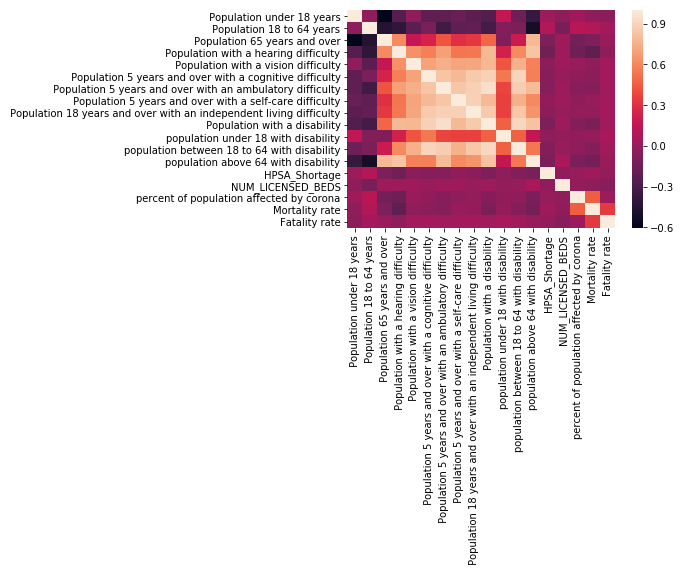

In [237]:
sns.heatmap(final_tab.corr())

In [238]:
Y_percentofcorona=final_tab["percent of population affected by corona"]
Y_mortality=final_tab["Mortality rate"]
Y_fatality=final_tab["Fatality rate"]
final_tab.drop(["percent of population affected by corona","Mortality rate","Fatality rate"],axis=1,inplace=True)


In [239]:
#for mortality rate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_tab, Y_mortality, test_size=0.3, random_state=101)

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
lm = LinearRegression()

In [242]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [243]:
predictions = lm.predict(X_test)

In [244]:
from sklearn import metrics

In [245]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.01107074312198765
MSE: 0.0003648515551137591
RMSE: 0.01910108779922649


In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

Feature: 0, Score: -0.00076
Feature: 1, Score: 0.00015
Feature: 2, Score: 0.00002
Feature: 3, Score: -0.00435
Feature: 4, Score: 0.00284
Feature: 5, Score: -0.00059
Feature: 6, Score: 0.00140
Feature: 7, Score: 0.00008
Feature: 8, Score: 0.00213
Feature: 9, Score: -0.00030
Feature: 10, Score: 0.00240
Feature: 11, Score: -0.00191
Feature: 12, Score: -0.00078
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00125


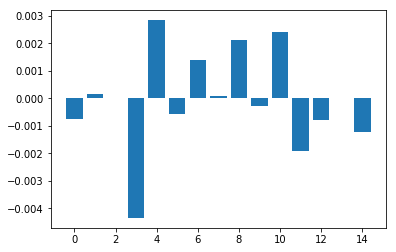

In [247]:
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [248]:
#model for percentage of corona affected people
X_train, X_test, y_train, y_test = train_test_split(final_tab, Y_percentofcorona, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.22116434130282586
MSE: 0.17648224025833456
RMSE: 0.42009789366091155


Feature: 0, Score: -0.00139
Feature: 1, Score: 0.01605
Feature: 2, Score: -0.01473
Feature: 3, Score: -0.18093
Feature: 4, Score: 0.08043
Feature: 5, Score: -0.03314
Feature: 6, Score: -0.10803
Feature: 7, Score: 0.04772
Feature: 8, Score: -0.00041
Feature: 9, Score: 0.05954
Feature: 10, Score: -0.07137
Feature: 11, Score: 0.02010
Feature: 12, Score: 0.11080
Feature: 13, Score: -0.00002
Feature: 14, Score: -0.00416


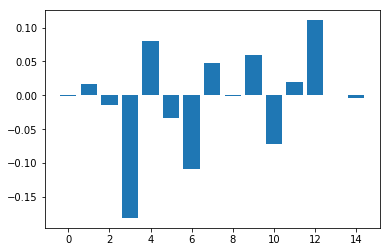

In [249]:
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [250]:
#model for percentage of corona affected people
X_train, X_test, y_train, y_test = train_test_split(final_tab, Y_fatality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.679139088209969
MSE: 45.34918131671104
RMSE: 6.734180077538099


Feature: 0, Score: 0.01269
Feature: 1, Score: 0.09949
Feature: 2, Score: 0.17154
Feature: 3, Score: -0.58742
Feature: 4, Score: 0.31803
Feature: 5, Score: -0.28496
Feature: 6, Score: 0.01257
Feature: 7, Score: -0.41443
Feature: 8, Score: 0.60214
Feature: 9, Score: 0.47727
Feature: 10, Score: 1.50702
Feature: 11, Score: -0.28705
Feature: 12, Score: -0.74271
Feature: 13, Score: -0.00015
Feature: 14, Score: -0.97004


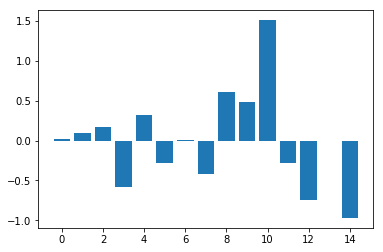

In [251]:
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Running independent model for different disability  

In [254]:
list(final_tab.columns)

['\xa0Population under 18 years',
 '\xa0Population 18 to 64 years',
 '\xa0Population 65 years and over',
 '\xa0Population with a hearing difficulty',
 '\xa0Population with a vision difficulty',
 '\xa0Population 5 years and over with a cognitive difficulty',
 '\xa0Population 5 years and over with an ambulatory difficulty',
 '\xa0Population 5 years and over with a self-care difficulty',
 '\xa0Population 18 years and over with an independent living difficulty',
 '\xa0Population with a disability',
 'population under 18 with disability',
 'population between 18 to 64 with disability',
 'population above 64 with disability',
 'HPSA_Shortage',
 'NUM_LICENSED_BEDS']

In [255]:
dis_feat= final_tab[['\xa0Population with a hearing difficulty','\xa0Population with a vision difficulty','\xa0Population 5 years and over with a cognitive difficulty',
 '\xa0Population 5 years and over with an ambulatory difficulty',
 '\xa0Population 5 years and over with a self-care difficulty',
 '\xa0Population 18 years and over with an independent living difficulty']]

In [263]:
dis_feat.head()

,Population with a hearing difficulty,Population with a vision difficulty,Population 5 years and over with a cognitive difficulty,Population 5 years and over with an ambulatory difficulty,Population 5 years and over with a self-care difficulty,Population 18 years and over with an independent living difficulty
Abbeville,5.482492,4.082621,6.797644,11.675004,3.667097,7.713410
Acadia,5.138403,5.021803,7.424090,10.720846,4.334979,6.713307
Accomack,4.086480,2.719245,4.762485,7.356882,2.752741,4.658952
Ada,3.408968,1.857661,4.225530,4.448459,2.080360,3.567087
Adair,5.129001,3.418434,5.642036,9.264335,3.311777,5.471925


Number of CORONA cases

Feature: 0, Score: -0.10562
Feature: 1, Score: 0.08351
Feature: 2, Score: 0.00768
Feature: 3, Score: -0.02128
Feature: 4, Score: 0.00681
Feature: 5, Score: 0.01983


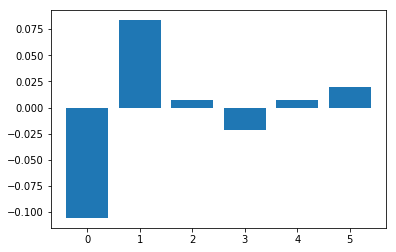

In [257]:
X_train, X_test, y_train, y_test = train_test_split(dis_feat, Y_percentofcorona, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Mortality Rate

Feature: 0, Score: -0.00463
Feature: 1, Score: 0.00178
Feature: 2, Score: -0.00122
Feature: 3, Score: -0.00008
Feature: 4, Score: 0.00080
Feature: 5, Score: 0.00213


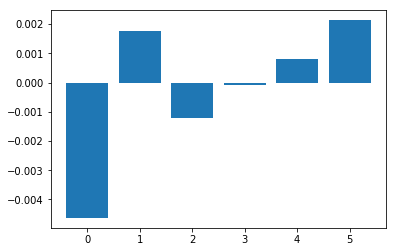

In [259]:
X_train, X_test, y_train, y_test = train_test_split(dis_feat, Y_mortality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Fatality Rate

Feature: 0, Score: -0.60098
Feature: 1, Score: 0.27750
Feature: 2, Score: 0.30794
Feature: 3, Score: -0.03794
Feature: 4, Score: -0.52651
Feature: 5, Score: 0.52876


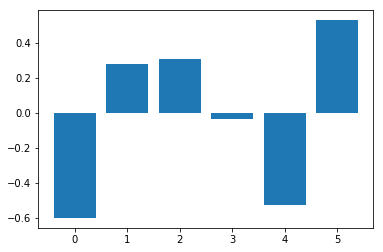

In [261]:
X_train, X_test, y_train, y_test = train_test_split(dis_feat, Y_fatality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Model on the basis of disability by age

In [262]:
dis_age=final_tab[['population under 18 with disability',
 'population between 18 to 64 with disability',
 'population above 64 with disability']]

Number of Corona Cases

Feature: 0, Score: -0.04199
Feature: 1, Score: 0.01454
Feature: 2, Score: -0.04682


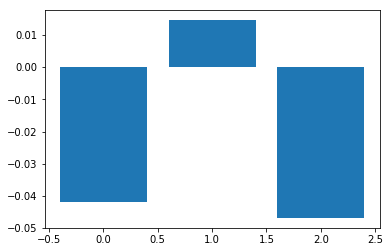

In [264]:
X_train, X_test, y_train, y_test = train_test_split(dis_age, Y_percentofcorona, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Fatality Rate

Feature: 0, Score: 1.52825
Feature: 1, Score: 0.20158
Feature: 2, Score: -0.31233


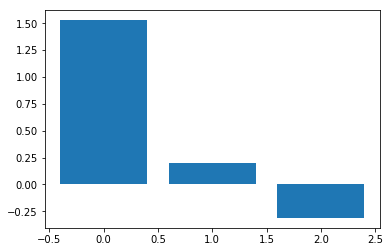

In [268]:
X_train, X_test, y_train, y_test = train_test_split(dis_age, Y_fatality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Mortality Rate

Feature: 0, Score: 0.00078
Feature: 1, Score: -0.00015
Feature: 2, Score: -0.00166


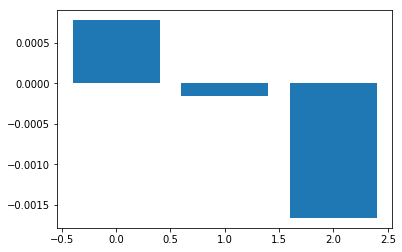

In [270]:
X_train, X_test, y_train, y_test = train_test_split(dis_age, Y_mortality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()


# Model on the basis of Health Resources

In [283]:
X_bed=pd.read_csv("Definitive_Healthcare__USA_Hospital_Beds.csv")
X_bed=bed.groupby("COUNTY_NAME").sum()
X_bed=X_bed[['NUM_STAFFED_BEDS','NUM_ICU_BEDS','AVG_VENTILATOR_USAGE']]

In [290]:
X_bed=pd.concat([X_bed,pop,disability,pract,death],axis=1,join="inner")

In [291]:
X_bed.head()

,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE,TotalPop,CountyId,Population under 18 years,Population 18 to 64 years,Population 65 years and over,Population with a hearing difficulty,Population with a vision difficulty,...,Population 18 years and over with an independent living difficulty,Population with a disability,population under 18 with disability,population between 18 to 64 with disability,population above 64 with disability,HPSA_Shortage,confirmed,deaths,recovered,active
Abbeville,0.100855,0.024205,0.008068,24788,45001,5164,14313,4954,1359,1012,...,1912,5019,383,2435,2201,2.2000,34,0,0,34
Acadia,0.230006,0.011181,0.004792,62607,22001,16527,36635,8493,3217,3144,...,4203,11657,1375,6185,4097,3.3900,152,11,0,141
Accomack,0.140073,0.030451,0.009135,32840,51001,6881,18515,7036,1342,893,...,1530,4320,227,1874,2219,0.1200,524,7,0,517
Ada,0.284981,0.022293,0.005516,435117,16001,109050,270636,59118,14833,8083,...,15521,44581,3748,22614,18219,2.4600,739,21,0,718
Adair,0.143110,0.025652,0.004050,74069,109004,15649,45815,11498,3799,2532,...,4053,12001,651,6459,4891,12.8488,88,13,0,76


In [292]:
X_bed["NUM_STAFFED_BEDS"]=X_bed["NUM_STAFFED_BEDS"]/X_bed["TotalPop"]*100
X_bed["NUM_ICU_BEDS"]=X_bed["NUM_ICU_BEDS"]/X_bed["TotalPop"]*100
X_bed["AVG_VENTILATOR_USAGE"]=X_bed["AVG_VENTILATOR_USAGE"]/X_bed["TotalPop"]*100

In [295]:
X_bed=X_bed[['NUM_STAFFED_BEDS',"NUM_ICU_BEDS","AVG_VENTILATOR_USAGE"]]
X_bed.head()

,NUM_STAFFED_BEDS,NUM_ICU_BEDS,AVG_VENTILATOR_USAGE
Abbeville,0.000407,0.000098,0.000033
Acadia,0.000367,0.000018,0.000008
Accomack,0.000427,0.000093,0.000028
Ada,0.000065,0.000005,0.000001
Adair,0.000193,0.000035,0.000005


Number of CORONA cases 

Feature: 0, Score: -1.78101
Feature: 1, Score: -12.25469
Feature: 2, Score: 9.22244


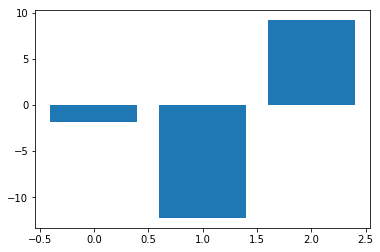

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_bed, Y_percentofcorona, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()


Mortality Rate

Feature: 0, Score: -0.20369
Feature: 1, Score: -0.22140
Feature: 2, Score: 2.30981


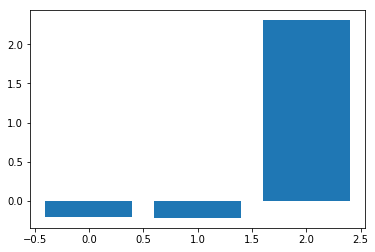

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X_bed, Y_mortality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Fatality Rate

Feature: 0, Score: -74.67803
Feature: 1, Score: -140.97776
Feature: 2, Score: 768.42727


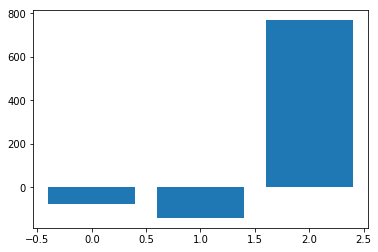

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_bed, Y_fatality, test_size=0.3, random_state=101)
lm.fit(X_train,y_train)
importance = lm.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()